## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## READING THE DATASET

In [2]:
train=pd.read_csv("Train.csv")
test= pd.read_csv("Test.csv")



In [3]:
train

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.80,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"


In [4]:
test

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0
...,...,...,...,...,...,...,...,...
2056,VHL17903,Abuja,Toyota,Avalon,"2,020",Red,Foreign Used,2650.0
2057,VHL14018,Ibadan,Audi,Q5,"2,011",Blue,Foreign Used,99000.0
2058,VHL17473,Ibadan,Toyota,Camry,"2,015",Black,Foreign Used,108000.0
2059,VHL11480,Abuja,Lexus,IS 350 AWD,"2,013",White,Foreign Used,52485.0


## DATA PREPROCESSING

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


In [7]:
train.drop("VehicleID", axis=1, inplace=True)
test.drop("VehicleID", axis=1, inplace=True)
#dropping columns

In [8]:
train.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [9]:
test.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour', 'Type', 'Distance'], dtype='object')

In [10]:
train.isnull().sum()
# checking for the number of null values present in the train data

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [11]:
test.isnull().sum()
# checking for the number of null values present in the test data

Location      0
Maker         0
Model         0
Year          2
Colour        0
Type         54
Distance    676
dtype: int64

In [12]:
train_modal_year=train["Year"].mode()[0]
print(train_modal_year)
train["Year"].fillna(train_modal_year, inplace=True)
#replacing null values with mode

2,008


In [13]:
test_modal_year= test["Year"].mode()[0]
print(test_modal_year)
test["Year"].fillna(test_modal_year, inplace=True)
#replacing null values with mode

2,008


In [14]:
train_mean_amount= train["Amount (Million Naira)"].mean()
print(train_mean_amount)
train["Amount (Million Naira)"].fillna(train_mean_amount, inplace=True)
#replacing null values with mean

11.847999443516994


In [15]:
def replace(s):
    i=str(s).find(",")
    if(i>0):
        return s[:i] + s[i+1:]
    else:
        return s
#the distance column of the train dataset came as an object datatype and we have to convert the datatype to float to fill in null values. The code above is used to iterate through each value in the distance column to remove the comma


In [16]:
train["Distance"]= train["Distance"].apply(replace)
#the iteration above was then applied to the dataframe distance from the train dataset

In [17]:
train["Distance"]= pd.to_numeric(train["Distance"], errors="coerce")
# the train column was then converted from object to float datatype with this line of code

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                7205 non-null   object 
 1   Maker                   7205 non-null   object 
 2   Model                   7205 non-null   object 
 3   Year                    7205 non-null   object 
 4   Colour                  7205 non-null   object 
 5   Amount (Million Naira)  7205 non-null   float64
 6   Type                    7008 non-null   object 
 7   Distance                4834 non-null   float64
dtypes: float64(2), object(6)
memory usage: 450.4+ KB


In [19]:
train["Distance"].head(50)

0          NaN
1     125000.0
2     110852.0
3      30000.0
4     125206.0
5          NaN
6          NaN
7          NaN
8     350882.0
9     179638.0
10     75858.0
11    111289.0
12    126075.0
13         NaN
14     16000.0
15         NaN
16     52352.0
17      7523.0
18         NaN
19     75300.0
20    170671.0
21      9000.0
22         NaN
23     20189.0
24     40000.0
25    100000.0
26         NaN
27     85474.0
28     42483.0
29     49000.0
30    140000.0
31    128885.0
32     96000.0
33    130000.0
34    118285.0
35         NaN
36    124540.0
37     88800.0
38       100.0
39     52000.0
40         NaN
41    180003.0
42         NaN
43     50000.0
44         NaN
45    120213.0
46     32000.0
47      4000.0
48         NaN
49         NaN
Name: Distance, dtype: float64

In [20]:
train_mean_distance=train["Distance"].mean()
print(train_mean_distance)
train["Distance"].fillna(train_mean_distance,  inplace=True)
#the null values where then filled

100453.86677699628


In [21]:
test_mean_distance=test["Distance"].mean()
print(test_mean_distance)
test["Distance"].fillna(test_mean_distance,  inplace=True)
#the test dataset already came with datatype float for the distance column so the null values were replaced with the mean value immediately

103800.66859205776


In [22]:
train.isnull().sum()
# still checking for null values in the train dataset...

Location                    0
Maker                       0
Model                       0
Year                        0
Colour                      0
Amount (Million Naira)      0
Type                      197
Distance                    0
dtype: int64

In [23]:
test.isnull().sum()
# still checking for null values in the test dataset...

Location     0
Maker        0
Model        0
Year         0
Colour       0
Type        54
Distance     0
dtype: int64

In [24]:
train.isnull().any()
# dataframe type was found to contain null values...

Location                  False
Maker                     False
Model                     False
Year                      False
Colour                    False
Amount (Million Naira)    False
Type                       True
Distance                  False
dtype: bool

In [25]:
mode_train_type= train["Type"].mode()[0]
print(mode_train_type)
train["Type"].fillna(mode_train_type, inplace=True)
# It was then filled with the modal attribute

Foreign Used


In [26]:
mode_test_type= test["Type"].mode()[0]
print(mode_test_type)
test["Type"].fillna(mode_test_type, inplace=True)
# It was also filled with the modal attribute

Foreign Used


In [27]:
test.isnull().any()
#confirmation that null values have been completely filled up

Location    False
Maker       False
Model       False
Year        False
Colour      False
Type        False
Distance    False
dtype: bool

In [28]:
cat_features={"Location",
             "Maker",               
             "Model",                   
              "Year",                    
             "Colour",                  
              "Type", }
for cat_feature in cat_features:
    print(cat_feature, train[cat_feature].unique(), sep=":")
    print(cat_feature,test[cat_feature].unique(),sep=":")
    print("#" *50)
# observing the categorical variables...

Maker:['Honda' 'Hyundai' 'Lexus' 'Mercedes-Benz' 'Toyota' 'Acura' 'Dodge'
 'Nissan' 'Kia' 'BMW' 'Volvo' 'Ford' 'Land Rover' 'Lincoln' 'Peugeot'
 'Chevrolet' 'Audi' 'Jaguar' 'Infiniti' 'Porsche' 'Fiat' 'Maserati'
 'Volkswagen' 'Suzuki' 'Bentley' 'GAC' 'Mazda' 'Scion' 'Renault'
 'Mitsubishi' 'Mini' 'Pontiac' 'Cadillac' 'Ferrari' 'Jeep' 'Buick'
 'Rolls-Royce' 'GMC' 'Chrysler' 'Lamborghini' 'Citroen' 'King' 'BAW'
 'Saturn' 'Tata' 'Opel' 'JAC' 'MG' 'Hummer' 'Subaru' 'Rover' 'Saab'
 'Skoda' 'IVM' 'Brabus']
Maker:['BMW' 'Toyota' 'Lexus' 'Mercedes-Benz' 'Honda' 'Pontiac' 'Hyundai'
 'Land Rover' 'Mitsubishi' 'Volkswagen' 'Acura' 'Mazda' 'Ford' 'Jaguar'
 'Opel' 'Infiniti' 'Kia' 'Peugeot' 'Nissan' 'Chevrolet' 'Cadillac' 'Seat'
 'Audi' 'Porsche' 'Dodge' 'GMC' 'Renault' 'Lincoln' 'Maserati' 'Chrysler'
 'Fiat' 'Subaru' 'Mini' 'Scion' 'Buick' 'Rolls-Royce' 'Volvo' 'Jeep'
 'Lamborghini' 'Brabus']
##################################################
Colour:['Silver' 'Red' 'Blue' 'Black' 'Gold' 'White' 'G

In [29]:
train.drop("Model", axis=1, inplace=True)
test.drop("Model", axis=1, inplace=True)
#model was found to have quite alot of unique categorical variables so dropping it was more convenient

In [30]:
train

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,"2,011",Silver,2.20,Nigerian Used,100453.866777
1,Ibadan,Hyundai,"2,012",Silver,3.50,Nigerian Used,125000.000000
2,Lagos,Lexus,"2,010",Red,9.20,Foreign Used,110852.000000
3,Abuja,Mercedes-Benz,"2,017",Blue,22.80,Foreign Used,30000.000000
4,Ibadan,Toyota,"2,002",Red,2.60,Nigerian Used,125206.000000
...,...,...,...,...,...,...,...
7200,Abuja,Honda,"2,018",Gray,5.70,Foreign Used,65000.000000
7201,Abuja,BMW,"2,007",White,4.00,Nigerian Used,200000.000000
7202,Abuja,Toyota,"2,010",Black,2.85,Nigerian Used,100453.866777
7203,Lagos,Mercedes-Benz,"2,012",Black,8.65,Foreign Used,85750.000000


In [31]:
test

,Location,Maker,Year,Colour,Type,Distance
0,Abuja,BMW,"2,008",White,Foreign Used,30524.000000
1,Lagos,Toyota,"2,013",White,Foreign Used,103800.668592
2,Lagos,Toyota,"2,005",Gold,Foreign Used,103800.668592
3,Lagos,Toyota,"2,011",Gray,Foreign Used,166839.000000
4,Lagos,Lexus,"2,013",Red,Foreign Used,88862.000000
...,...,...,...,...,...,...
2056,Abuja,Toyota,"2,020",Red,Foreign Used,2650.000000
2057,Ibadan,Audi,"2,011",Blue,Foreign Used,99000.000000
2058,Ibadan,Toyota,"2,015",Black,Foreign Used,108000.000000
2059,Abuja,Lexus,"2,013",White,Foreign Used,52485.000000


C:\Users\VIVIAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount (Million Naira)'>

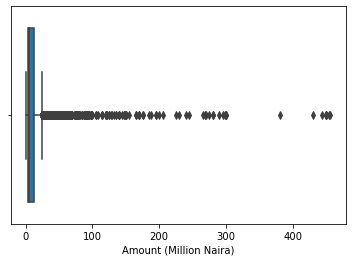

In [32]:
sns.boxplot(train["Amount (Million Naira)"])
# the target column was then observed for outliers

In [33]:
for x in ["Amount (Million Naira)"]:
    q75,q25=np.percentile(train.loc[:,x],[75,25])
    intr_qr=q75-q25
    
    
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    
    train.loc[train[x]< min,x]=np.nan
    train.loc[train[x]> max,x]=np.nan
    
# the outliers were dealt with

In [34]:
train.isnull().sum()
#it created null values in the amount column

Location                    0
Maker                       0
Year                        0
Colour                      0
Amount (Million Naira)    672
Type                        0
Distance                    0
dtype: int64

In [35]:
mean_amount=train["Amount (Million Naira)"].mean()
print(mean_amount)
train["Amount (Million Naira)"].fillna(mean_amount, inplace=True)
#the null values were then filled with mean amount

6.894136842268453


C:\Users\VIVIAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount (Million Naira)'>

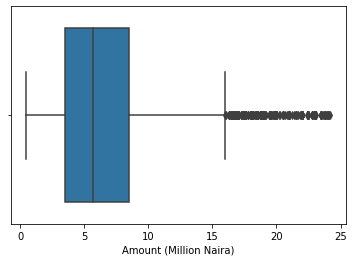

In [36]:
sns.boxplot(train["Amount (Million Naira)"])
#checking again, the outliers were alot less than before

In [37]:
test.isnull().any()

Location    False
Maker       False
Year        False
Colour      False
Type        False
Distance    False
dtype: bool

In [38]:
train.isnull().any()

Location                  False
Maker                     False
Year                      False
Colour                    False
Amount (Million Naira)    False
Type                      False
Distance                  False
dtype: bool

In [39]:
train

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,"2,011",Silver,2.20,Nigerian Used,100453.866777
1,Ibadan,Hyundai,"2,012",Silver,3.50,Nigerian Used,125000.000000
2,Lagos,Lexus,"2,010",Red,9.20,Foreign Used,110852.000000
3,Abuja,Mercedes-Benz,"2,017",Blue,22.80,Foreign Used,30000.000000
4,Ibadan,Toyota,"2,002",Red,2.60,Nigerian Used,125206.000000
...,...,...,...,...,...,...,...
7200,Abuja,Honda,"2,018",Gray,5.70,Foreign Used,65000.000000
7201,Abuja,BMW,"2,007",White,4.00,Nigerian Used,200000.000000
7202,Abuja,Toyota,"2,010",Black,2.85,Nigerian Used,100453.866777
7203,Lagos,Mercedes-Benz,"2,012",Black,8.65,Foreign Used,85750.000000


In [40]:
cat_features={"Location",
             "Maker",
             "Year",
             "Colour",
              "Type"
             }

for cat_feature in cat_features:
    train[f"{cat_feature}_cat"]=train[cat_feature].astype("category")
    train[f"{cat_feature}_cat"]=train[f"{cat_feature}_cat"].cat.codes
# this was used to encode the categorical features    
train.head()

,Location,Maker,Year,Colour,Amount (Million Naira),Type,Distance,Maker_cat,Colour_cat,Type_cat,Year_cat,Location_cat
0,Abuja,Honda,"2,011",Silver,2.2,Nigerian Used,100453.866777,17,16,2,21,0
1,Ibadan,Hyundai,"2,012",Silver,3.5,Nigerian Used,125000.000000,19,16,2,22,1
2,Lagos,Lexus,"2,010",Red,9.2,Foreign Used,110852.000000,29,15,1,20,2
3,Abuja,Mercedes-Benz,"2,017",Blue,22.8,Foreign Used,30000.000000,34,2,1,27,0
4,Ibadan,Toyota,"2,002",Red,2.6,Nigerian Used,125206.000000,52,15,2,12,1


In [41]:
train.drop(["Location","Maker","Year","Colour","Type"], axis=1, inplace=True)
#the redundant columns of the categorical features were then dropped

In [42]:
train

,Amount (Million Naira),Distance,Maker_cat,Colour_cat,Type_cat,Year_cat,Location_cat
0,2.20,100453.866777,17,16,2,21,0
1,3.50,125000.000000,19,16,2,22,1
2,9.20,110852.000000,29,15,1,20,2
3,22.80,30000.000000,34,2,1,27,0
4,2.60,125206.000000,52,15,2,12,1
...,...,...,...,...,...,...,...
7200,5.70,65000.000000,17,7,1,28,0
7201,4.00,200000.000000,3,19,2,17,0
7202,2.85,100453.866777,52,1,2,20,0
7203,8.65,85750.000000,34,1,1,22,2


## ENCODING CATEGORICAL VARIABLES

In [43]:
for cat_feature in cat_features:
    test[f"{cat_feature}_cat"]=test[cat_feature].astype("category")
    test[f"{cat_feature}_cat"]=test[f"{cat_feature}_cat"].cat.codes
# encoding was also done in the test dataset   
test.head()

,Location,Maker,Year,Colour,Type,Distance,Maker_cat,Colour_cat,Type_cat,Year_cat,Location_cat
0,Abuja,BMW,"2,008",White,Foreign Used,30524.000000,2,16,1,14,0
1,Lagos,Toyota,"2,013",White,Foreign Used,103800.668592,37,16,1,19,2
2,Lagos,Toyota,"2,005",Gold,Foreign Used,103800.668592,37,7,1,11,2
3,Lagos,Toyota,"2,011",Gray,Foreign Used,166839.000000,37,8,1,17,2
4,Lagos,Lexus,"2,013",Red,Foreign Used,88862.000000,20,12,1,19,2


In [44]:
test.drop(["Location","Maker","Year","Colour","Type"], axis=1, inplace=True)
#categorical features also dropped

In [45]:
test

,Distance,Maker_cat,Colour_cat,Type_cat,Year_cat,Location_cat
0,30524.000000,2,16,1,14,0
1,103800.668592,37,16,1,19,2
2,103800.668592,37,7,1,11,2
3,166839.000000,37,8,1,17,2
4,88862.000000,20,12,1,19,2
...,...,...,...,...,...,...
2056,2650.000000,37,12,1,26,0
2057,99000.000000,1,3,1,17,1
2058,108000.000000,37,2,1,21,1
2059,52485.000000,20,16,1,19,0


## MACHINE LEARNING

In [46]:
y=train["Amount (Million Naira)"]
X=train.drop("Amount (Million Naira)", axis=1)
# our target variable  was separated from the other independent variables

In [47]:
X_train,X_test,y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
# the train and test dataset was created by splitting the train data, setting the random state to 42

In [48]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
#linear regression model was applied

LinearRegression()

In [49]:
y_pred=reg.predict(X_test)
y_pred
# prediction was done

array([ 4.51563289,  7.41877127, 11.16249121, ...,  9.40244051,
        7.64620597,  9.65346952])

In [50]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(y_test,y_pred))
# mean squared error was used as the metric to test the accuracy of the model

MSE:  13.34940728374813


In [51]:
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)

print(rmse)
# assigned a variable to the mean squared error and the root mean squared error(not that important)

3.6536840700515048


In [52]:
test_pred= reg.predict(test)
test_pred
# the test dataset was predicted

array([2.17271408, 6.59928136, 1.84545195, ..., 6.96256325, 5.18878919,
       2.66630171])

In [53]:
submission= pd.read_csv("SampleSubmission.csv")
submission.head()
# the submission dataset was read

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [54]:
submission["Amount (Million Naira)"]=test_pred
# the test predictions was assigned to the target variable in the submission dataset

In [55]:
submission

,VehicleID,Amount (Million Naira)
0,VHL18518,2.172714
1,VHL17149,6.599281
2,VHL10927,1.845452
3,VHL12909,5.169755
4,VHL12348,6.485132
...,...,...
2056,VHL17903,9.587418
2057,VHL14018,4.347777
2058,VHL17473,6.962563
2059,VHL11480,5.188789


In [56]:
submission.to_csv("Final submission.csv", index=False)
# the submission was converted to a csv file

# improving accuracy of the model using xgboost

In [57]:
from xgboost import XGBRegressor
xg_boost=XGBRegressor()

xg_boost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [58]:
y_pred=xg_boost.predict(X_test)
y_pred

array([ 5.5881634, 10.706333 , 12.050221 , ..., 15.122808 ,  4.976084 ,
       15.741096 ], dtype=float32)

In [59]:
print("MSE: ", mean_squared_error(y_test,y_pred))

MSE:  10.1324842961343


In [60]:
test_pred= xg_boost.predict(test)
test_pred

array([1.9777232, 3.9658554, 1.357234 , ..., 2.556708 , 5.096202 ,
       3.155451 ], dtype=float32)

In [61]:
submission["Amount (Million Naira)"]=test_pred

In [62]:
submission

,VehicleID,Amount (Million Naira)
0,VHL18518,1.977723
1,VHL17149,3.965855
2,VHL10927,1.357234
3,VHL12909,3.291476
4,VHL12348,3.540874
...,...,...
2056,VHL17903,9.265935
2057,VHL14018,3.001662
2058,VHL17473,2.556708
2059,VHL11480,5.096202


In [63]:
submission.to_csv("Final submission 3.csv", index=False)

## USING RANDOM FOREST TO IMPROVE THE MODEL

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [65]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [66]:
y_pred=rf.predict(X_test)
y_pred

array([ 3.7922    ,  6.9441625 , 10.69707826, ..., 12.88224432,
        3.3608    , 12.53016547])

In [67]:
print("MSE: ", mean_squared_error(y_test,y_pred))

MSE:  10.793895701663761


In [68]:
test_pred= rf.predict(test)
test_pred

array([3.7087    , 4.8535498 , 2.0578    , ..., 4.9086    , 3.9075    ,
       3.91288333])

In [69]:
submission["Amount (Million Naira)"]=test_pred

In [70]:
submission

,VehicleID,Amount (Million Naira)
0,VHL18518,3.708700
1,VHL17149,4.853550
2,VHL10927,2.057800
3,VHL12909,4.717667
4,VHL12348,3.154400
...,...,...
2056,VHL17903,13.287789
2057,VHL14018,3.523500
2058,VHL17473,4.908600
2059,VHL11480,3.907500


In [71]:
submission.to_csv("second submission.csv", index=False)

In [72]:
''' Apparently, random forest was not a great algorithm for this compared to xgboost and linear regression. Cheers to me working on more models/algorithms!'''

' Apparently, random forest was not a great algorithm for this compared to xgboost and linear regression. Cheers to me working on more models/algorithms!'